**Fragestellung:** Wie unterscheiden sich die drei Iris-Arten (Iris setosa, Iris versicolor und Iris virginica) in Bezug auf die vier gemessenen Merkmale (Kelchblattlänge, Kelchblattbreite, Kronblattlänge und Kronblattbreite)?

In [3]:
# Importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading the dataframe

iris_data = pd.read_csv("data/iris.csv")

## Getting An Overview

In [5]:
# Taking a look at the head

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Taking a look at the tail

iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
# Taking a look at the data types

iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# Taking a look at the shape

iris_data.shape

(150, 5)

In [9]:
# Taking a look at some basic descriptive statistics

iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_data.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [11]:
# Infos about the dataframe

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# Checking how many values are NaN or NA

iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Cleaning The Data

In [13]:
# Dropping the duplicates

previous_len = len(iris_data)
iris_data = iris_data.drop_duplicates()
print(f"{previous_len - len(iris_data)} rows have been dropped because they were duplicates.")
iris_data

3 rows have been dropped because they were duplicates.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Analyzing The Data

C:\Users\Leo\AppData\Local\Temp\ipykernel_6948\1322984898.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


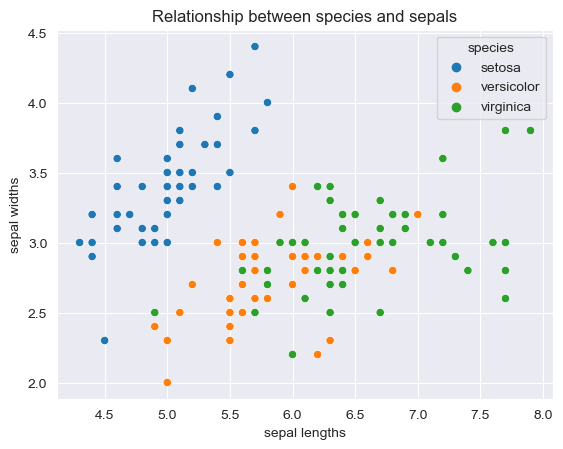

In [14]:
# Relationship between species and sepals

with pd.option_context('mode.use_inf_as_na', True):
    sns.scatterplot(iris_data, x=iris_data.sepal_length, y=iris_data.sepal_width, hue=iris_data.species)
    plt.title("Relationship between species and sepals")
    plt.xlabel("sepal lengths")
    plt.ylabel("sepal widths")

C:\Users\Leo\AppData\Local\Temp\ipykernel_6948\985043559.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


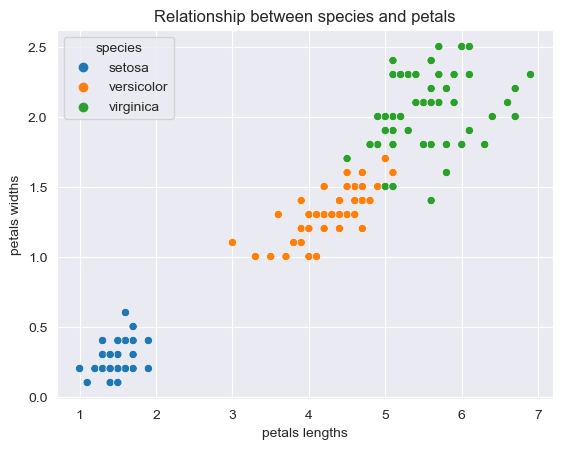

In [15]:
# Relationship between species and petals

with pd.option_context('mode.use_inf_as_na', True):
    sns.scatterplot(iris_data, x=iris_data.petal_length, y=iris_data.petal_width, hue=iris_data.species)
    plt.title("Relationship between species and petals")
    plt.xlabel("petals lengths")
    plt.ylabel("petals widths")

In [16]:
# Grouping the data by the key "species"

species_data = iris_data.groupby("species")

In [17]:
# Minimums of the data set, grouped by species

species_data.min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [18]:
# Maximums of the data set, grouped by species

species_data.max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [19]:
# Averages of the data set, grouped by species

species_data.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.010417,3.431250,1.462500,0.250000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


In [20]:
def find_real_leaf_index(by: str, params: tuple, df: pd.DataFrame) -> int:
    df['area'] = df[params[0]] * df[params[1]]
    largest_index = df['area'].idxmax()
    
    match by:
        case "max":
            return df['area'].idxmax()
        case "min":
            return df['area'].idxmin()

In [21]:
petal_data = iris_data[["petal_width", "petal_length", "species"]]

In [22]:
# Locating the largest real petal leaf

petal_data.iloc[find_real_leaf_index(by="max", params=("petal_length", "petal_width"), df=petal_data)]

C:\Users\Leo\AppData\Local\Temp\ipykernel_6948\3822807787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df[params[0]] * df[params[1]]


petal_width           2.3
petal_length          5.7
species         virginica
area                13.11
Name: 120, dtype: object

In [23]:
# Locating the smallest real petal leaf

petal_data.iloc[find_real_leaf_index(by="min", params=("petal_length", "petal_width"), df=petal_data)]

C:\Users\Leo\AppData\Local\Temp\ipykernel_6948\3822807787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df[params[0]] * df[params[1]]


petal_width        0.1
petal_length       1.1
species         setosa
area              0.11
Name: 13, dtype: object

In [25]:
sepal_data = iris_data[["sepal_width", "sepal_length", "species"]]

In [26]:
# Locating the largest real sepal leaf

sepal_data.iloc[find_real_leaf_index(by="max", params=("sepal_length", "sepal_width"), df=sepal_data)]

C:\Users\Leo\AppData\Local\Temp\ipykernel_6948\3822807787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df[params[0]] * df[params[1]]


sepal_width           2.8
sepal_length          6.3
species         virginica
area                17.64
Name: 133, dtype: object

In [27]:
# Locating the smallest real sepal leaf

sepal_data.iloc[find_real_leaf_index(by="min", params=("sepal_length", "sepal_width"), df=sepal_data)]

C:\Users\Leo\AppData\Local\Temp\ipykernel_6948\3822807787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df[params[0]] * df[params[1]]


sepal_width            2.2
sepal_length           6.0
species         versicolor
area                  13.2
Name: 62, dtype: object

## Schlussfolgerungen

<u>Allgemein:</u><br>
Die vorliegenden Daten umfassen die statistischen Kennzahlen für die Merkmale der Kelchblätter und Blütenblätter von insgesamt 147 Beobachtungen. Die Kelchblätter weisen eine durchschnittliche Länge von 5,9cm auf, wobei die Länge zwischen 4,3cm und 7,9cm variiert. Die Breite der Kelchblätter beträgt im Durchschnitt 3,1cm und variiert zwischen 2,0cm und 4,4cm. Die Blütenblätter haben eine durchschnittliche Länge von 3,8cm, wobei die gemessenen Längen zwischen 1,0cm und 6,9cm liegen. Die Breite der Blütenblätter beträgt im Mittel 1,2cm und variiert von 0,1cm bis 2,5cm.

<u>Blütenblätter:</u><br>
<br>
<img src="output/petals.png" alt="alt text" width="500" height="auto">

Die durchschnittliche Breite der Blütenblätter liegt bei 1,20cm und die durchschnittliche Länge bei 3,78cm. Das Maximum liegt bei einer Länge von 6,9cm und einer Breite von 2,5cm, während das Minimum bei einer Länge von 1,0cm und einer Breite von 0,1cm liegt. Hierbei ist anzumerken, dass es sich dabei nicht um tatsächlich gemessene Blumen, sondern den statistischen Durchschnitt handelt.
<br>
Bei der größten Blume handelt es sich um die Blume mit der ID 120. Diese hat eine Länge von 5,7cm und eine Breite von 2,3cm. Ihre Spezies ist eine *verginica*. Bei der kleinsten Blume handelt es sich um die Blume der Spezies *setosa* mit der ID 13. Sie ist gerade einmal 0,1cm breit und 1,1cm lang.
1. Die Blütenblätter der Spezies *virginica* sind besonders groß (sowohl in der Länge, als auch in der Breite). Durchschnittlich ist ein Blütenblatt circa 5,56cm lang und 2,02cm breit. Ihre Blütenblätter erreichen eine maximale Länge von 6,9cm und eine maximale Breite von 2.5cm. Auch die minimalen Werte (4,5cm lang, 1,5cm breit) befinden sich deutlich oberhalb der anderen Spezies.
2. Die Spezies *versicolor* gliedert sich in der Mitte ein. Sie erreicht maximale Größen von 5,1cm in der Länge und 1,8cm in der Breite. Mit einer minimalen Länge von 3,0cm und einer minimalen Breite von 1,0 reiht sie sich zwischen *virginica* und *setosa* ein. Durchschnittlich werden ihre Blütenblätter 4,26cm lang und 1,32cm breit.
3. Bei der Spezies mit den kleinsten Blütenblättern handelt es sich um die Spezies *setosa*. Mit einer durchschnittlichen Länge von 1,46cm und einer durchschnittlichen Breite von 0,25cm liegt sie deutlich unterhalb des allgemeinen Durchschnitts. Sie erreicht maximale Größen von 1,9cm in der Länge und 0,6cm in der Breite. Das kleine Blütenblatt dieser Spezies hat eine Größe von 1,0cm in der Länge und gerade einmal 0,1cm in der Breite.

<u>Kelchblätter:</u><br>
<br>
<img src="output/sepals.png" alt="alt text" width="500" height="auto">

Die durchschnittliche Breite der Kelchblätter liegt bei 3,05cm und die durchschnittliche Länge bei 5,85cm. Das Maximum liegt bei einer Länge von 7,9cm und einer Breite von 4,4cm, während das Minimum bei einer Länge von 4,3cm und einer Breite von 2cm liegt. Hierbei ist anzumerken, dass es sich dabei nicht um tatsächlich gemessene Blumen, sondern den statistischen Durchschnitt handelt.
<br>
Die größte Blume basiert auf ihrer Blütenkrone und gehört zur ID 133. Diese Blume misst 6,3 cm in der Länge und 2,8 cm in der Breite. Es handelt sich um eine verginica Spezies. Die kleinste Blume gehört zur Spezies versicolor und hat die ID 62. Sie ist nur 2,2 cm breit und 6,0 cm lang.
<br>
Im Gegensatz zu den Größen der Blütenblättern kann man keine wirklich großen Unterschiede erkennen. 
1. Die Blütenblätter der Spezies *setosa* sind besonders breit aber auch besonders kurz. Durchschnittlich ist ein Blütenblatt circa 3,43cm breit, aber nur 5,01cm lang. Ihre Blütenblätter erreichen eine maximale Breite 4,4cm bei einer Länge von 5,8cm. Die minimale Breite liegt bei 2,3cm und die minimale Länge bei 4,3cm. 
2. Die Spezies *verginica* und *versicolor* befinden sind im gleichen Bereich, wobei die Spezies *virginica* ein wenig länger wird. Beide Spezies sind weniger breit als *setosa*, aber deutlich länger. Die Art *versicolor* zeichnet sich durch eine minimale Breite von 2,0cm und eine maximale Länge von 7,0cm aus. Im Durchschnitt beträgt ihre Breite 2,8cm und ihre Länge 5,9cm. Im Vergleich dazu zeigt die Art *virginica* eine minimale Breite von 2,2cm und eine maximale Länge von 7,9cm. Die durchschnittliche Breite von *virginica* liegt bei 3,0cm, während ihre durchschnittliche Länge 6,6cm beträgt.

In [24]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
